In [219]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マウントを行う
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("Not Google Colab")

Not Google Colab


In [220]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # ライブラリのインストール
    !pip install opencv-python==4.5.5.62
else:
    print("Not Google Colab")

Not Google Colab


In [221]:
import csv
import os
import pickle
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
#sns.set(font="IPAexGothic",style="white")
import cv2
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
%matplotlib inline
import matplotlib.pyplot as plt
# "%matplotlib inline" の代わりに以下のコマンドを使用できる場合、3次元で座標軸を操作可能なプロットを表示することができる
# %matplotlib notebook

# 乱数シードを指定
np.random.seed(seed=0)

In [222]:
# データの読み込み
train = pd.read_csv("/Users/uenokoumare/Library/CloudStorage/GoogleDrive-sd20024@tti-j.net/マイドライブ/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/titanic/Titanic/train.csv")
test = pd.read_csv("/Users/uenokoumare/Library/CloudStorage/GoogleDrive-sd20024@tti-j.net/マイドライブ/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/titanic/Titanic/test.csv")
sample = pd.read_csv("/Users/uenokoumare/Library/CloudStorage/GoogleDrive-sd20024@tti-j.net/マイドライブ/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/titanic/Titanic/gender_submission.csv")
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

Data Shapes
Train: (891, 12) Test: (418, 11) Sample: (418, 2)


In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [226]:
# データ構造とデータ型をチェック
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
# 要約統計量をチェック
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


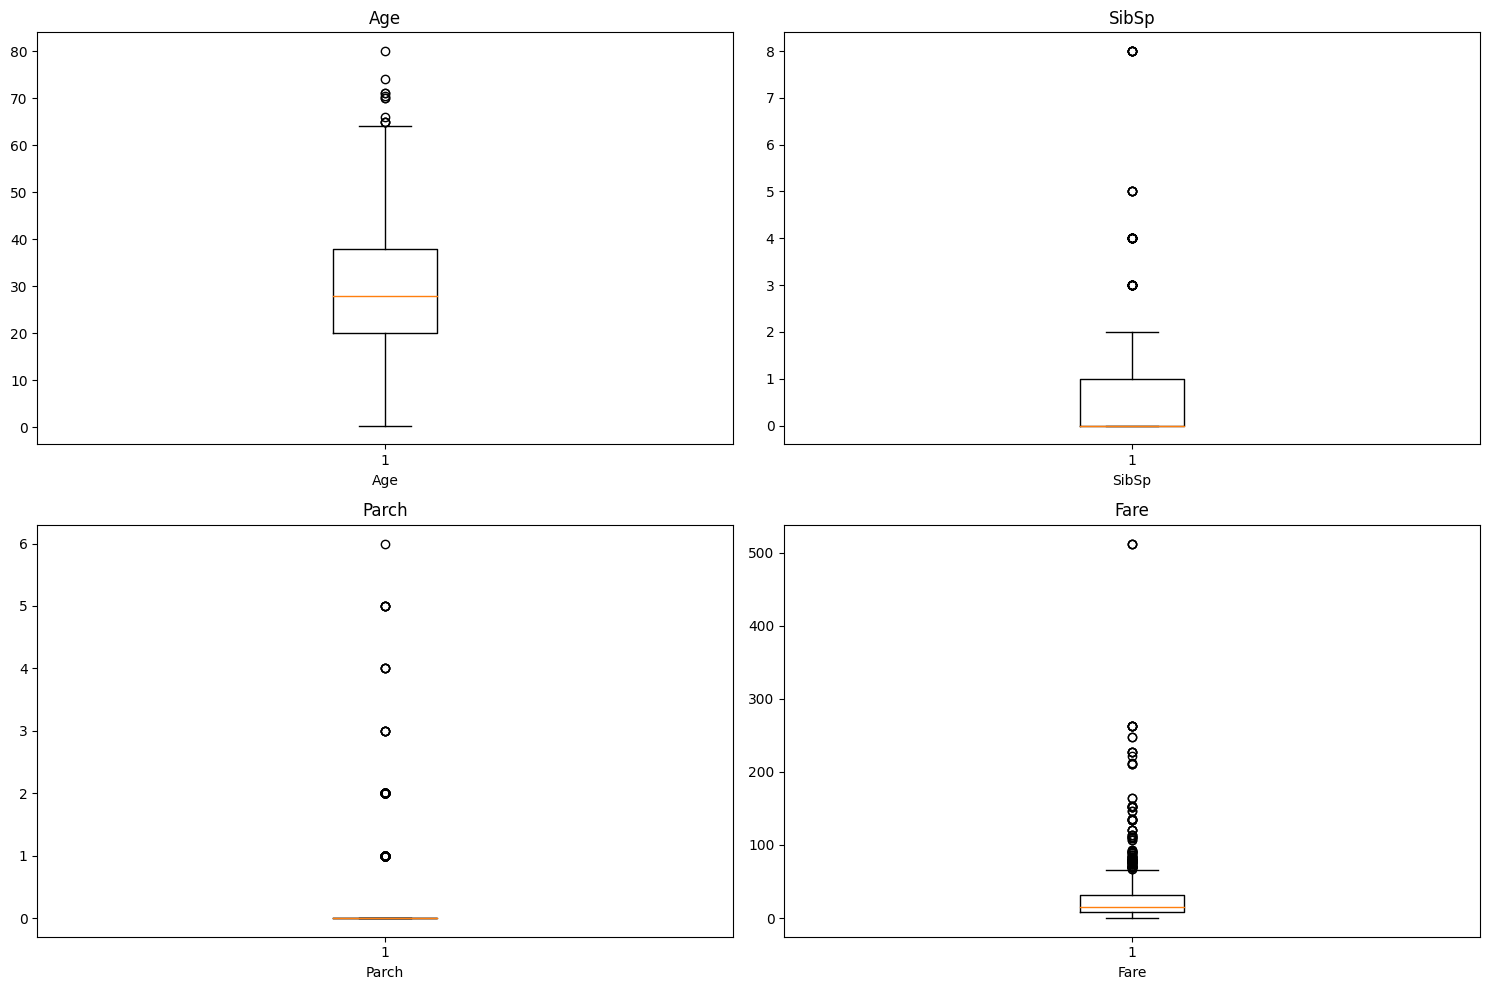

In [228]:
# 箱ひげ図を作成する列のリスト
columns = ['Age', 'SibSp', 'Parch', 'Fare']

# 各列に対して箱ひげ図を作成
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(train[column].dropna().values)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [229]:
# 要約統計量をチェック
train.describe(include="O") # include="O" と指定することで、オブジェクト型の列（文字列型の列）のみが対象

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [230]:
# 欠損のチェック
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
# 欠損のチェック
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [232]:
#train["Age"]は177/(714+177) (約%20欠損)  →  Aveで補完
#train["Cabin"]は687/(204+687) (約%77欠損)  →  "No"で補完
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("No")
train["Embarked"] = train["Embarked"].fillna("S")
test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Fare"] = test["Fare"].fillna(train["Fare"].mean())
test["Cabin"] = test["Cabin"].fillna("No")

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [233]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

# テストデータのSexを数値に変換
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

# テストデータのEmbarkedを数値に変換
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2


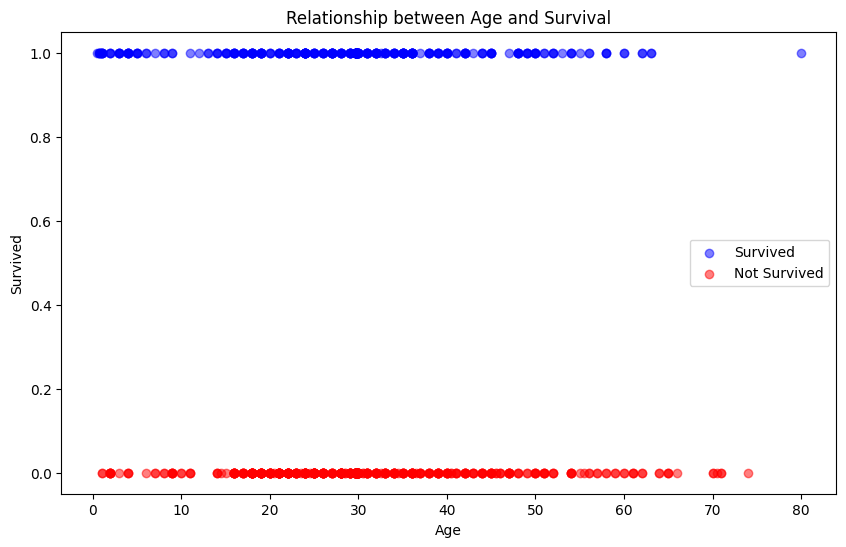

In [234]:
# 生存者と非生存者のデータを分ける
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

# 散布図を作成
plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Survived'], color='blue', alpha=0.5, label='Survived')
plt.scatter(not_survived['Age'], not_survived['Survived'], color='red', alpha=0.5, label='Not Survived')

# 軸ラベルとタイトルを設定
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Relationship between Age and Survival')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()


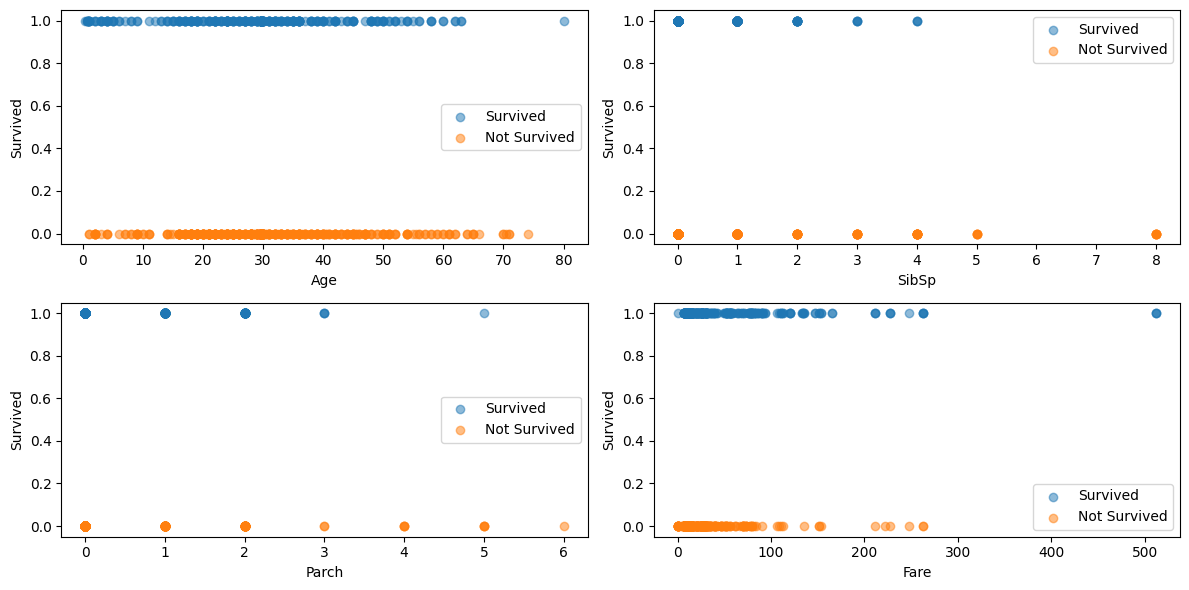

In [235]:
# Survivedが1（生存）のデータと0（非生存）のデータを抽出
survived_data = train[train['Survived'] == 1]
not_survived_data = train[train['Survived'] == 0]

# 散布図を作成
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(survived_data['Age'], survived_data['Survived'], label='Survived', alpha=0.5)
plt.scatter(not_survived_data['Age'], not_survived_data['Survived'], label='Not Survived', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(survived_data['SibSp'], survived_data['Survived'], label='Survived', alpha=0.5)
plt.scatter(not_survived_data['SibSp'], not_survived_data['Survived'], label='Not Survived', alpha=0.5)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(survived_data['Parch'], survived_data['Survived'], label='Survived', alpha=0.5)
plt.scatter(not_survived_data['Parch'], not_survived_data['Survived'], label='Not Survived', alpha=0.5)
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(survived_data['Fare'], survived_data['Survived'], label='Survived', alpha=0.5)
plt.scatter(not_survived_data['Fare'], not_survived_data['Survived'], label='Not Survived', alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()

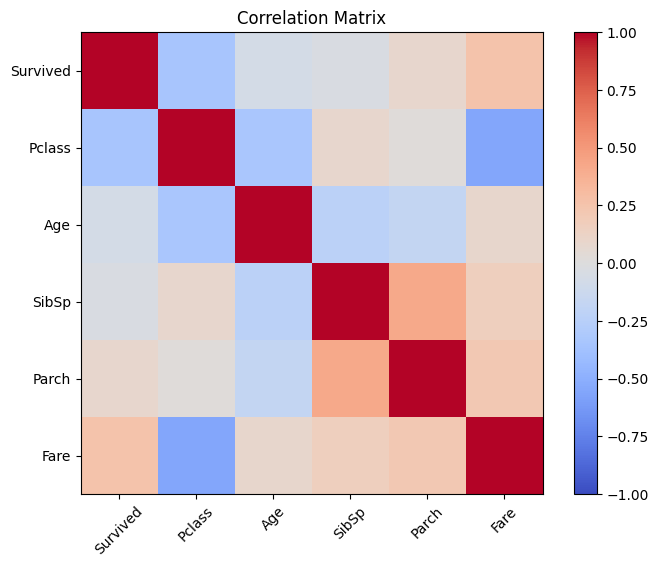

In [236]:
# 相関係数を計算
correlation_matrix = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# ヒートマップを作成
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=45)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

Survived-Fare、Parch-SibSpの相関が強い
"Parch"（パーチ）: 同乗している親や子供の数（親子関係）
"SibSp"（シブスプ）: 同乗している兄弟姉妹や配偶者の数（兄弟姉妹や配偶者間の関係）

　→ Survived-Fareの相関がありそう

In [237]:
# Fareが100以上のデータを抽出
fare_greater_than_100 = train[train['Fare'] >= 100]

# Fareが100以上かつSurvivedが1（生存）であるデータの数を取得
survived_count = fare_greater_than_100[fare_greater_than_100['Survived'] == 1].shape[0]

# Fareが100以上かつSurvivedが0（非生存）であるデータの数を取得
not_survived_count = fare_greater_than_100[fare_greater_than_100['Survived'] == 0].shape[0]

# 生存者と非生存者のパーセンテージを計算
survived_percentage = (survived_count / fare_greater_than_100.shape[0]) * 100
not_survived_percentage = (not_survived_count / fare_greater_than_100.shape[0]) * 100

# 結果を表示
print(f"Survived: {survived_percentage:.2f}%")
print(f"Not Survived: {not_survived_percentage:.2f}%")

Survived: 73.58%
Not Survived: 26.42%


In [238]:
# Fareが100以下のデータを抽出
fare_greater_than_100 = train[train['Fare'] <= 100]

# Fareが100以上かつSurvivedが1（生存）であるデータの数を取得
survived_count = fare_greater_than_100[fare_greater_than_100['Survived'] == 1].shape[0]

# Fareが100以上かつSurvivedが0（非生存）であるデータの数を取得
not_survived_count = fare_greater_than_100[fare_greater_than_100['Survived'] == 0].shape[0]

# 生存者と非生存者のパーセンテージを計算
survived_percentage = (survived_count / fare_greater_than_100.shape[0]) * 100
not_survived_percentage = (not_survived_count / fare_greater_than_100.shape[0]) * 100

# 結果を表示
print(f"Survived: {survived_percentage:.2f}%")
print(f"Not Survived: {not_survived_percentage:.2f}%")

Survived: 36.16%
Not Survived: 63.84%


In [239]:
# 新しい特徴量 "HighFare" を作成
train['HighFare'] = (train['Fare'] >= 100).astype(int)
test['HighFare'] = (test['Fare'] >= 100).astype(int)

'HighFare'が1の人は生きてる人という後に特徴量を追加する時に使用する？

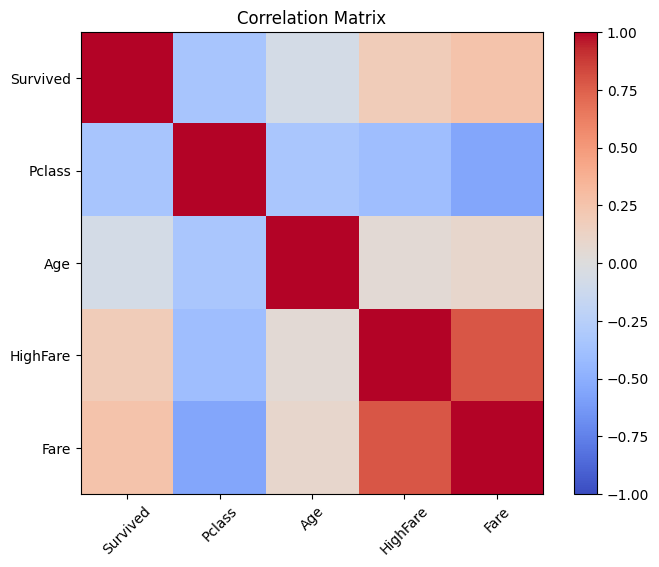

In [240]:
# 相関係数を計算
correlation_matrix = train[['Survived', "Pclass", 'Age', "HighFare", 'Fare']].corr()

# ヒートマップを作成
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=45)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

"HighFare"より"Fare"の方が相関高そう
"Pclass"もチケット階層なので"Fare"と一緒で相関が高い

決定木でモデリング

In [241]:
'''
# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
 
# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
 
# 「test」の説明変数の値を取得
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values
 
# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_one.predict(test_features)

PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"]) 
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree.csv", index_label = ["PassengerId"])
'''

'\n# 「train」の目的変数と説明変数の値を取得\ntarget = train["Survived"].values\nfeatures_one = train[["Pclass", "Sex", "Age", "Fare"]].values\n \n# 決定木の作成\nmy_tree_one = tree.DecisionTreeClassifier()\nmy_tree_one = my_tree_one.fit(features_one, target)\n \n# 「test」の説明変数の値を取得\ntest_features = test[["Pclass", "Sex", "Age", "Fare"]].values\n \n# 「test」の説明変数を使って「my_tree_one」のモデルで予測\nmy_prediction = my_tree_one.predict(test_features)\n\nPassengerId = np.array(test["PassengerId"]).astype(int)\nmy_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"]) \n# my_tree_one.csvとして書き出し\nmy_solution.to_csv("my_tree.csv", index_label = ["PassengerId"])\n'

ランダムフォレストでモデリング

In [242]:
'''
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

my_solution = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": predictions})
my_solution.to_csv('my_RandomForest.csv', index=False)
'''

'\ny = train["Survived"]\n\nfeatures = ["Pclass", "Sex", "SibSp", "Parch"]\nX = pd.get_dummies(train[features])\nX_test = pd.get_dummies(test[features])\n\nmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)\nmodel.fit(X, y)\npredictions = model.predict(X_test)\n\nmy_solution = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": predictions})\nmy_solution.to_csv(\'my_RandomForest.csv\', index=False)\n'

MLPでモデリング

In [243]:
def relu(v):
    x = np.maximum(0, v)
    return x

In [244]:
def MSE(t, y):
    mse = np.mean(np.square(t - y))
    return mse

In [245]:
# データの分割
X_train, X_test, T_train, T_test = train_test_split(train, train['Survived'], test_size=0.5, random_state=42)

# x_trainの特定のカラム名のデータだけ抽出
selected_columns = ["Pclass","Fare"]
#selected_columns = ["Pclass", "Sex", "Age", "Fare"]
x_train = X_train[selected_columns].values

# x_testの特定のカラム名のデータだけ抽出
x_test = X_test[selected_columns].values

# t_trainのデータだけ抽出
t_train = T_train.values

# t_testのデータだけ抽出
t_test = T_test.values

# 分割後のデータの確認
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

# 最初の行を削除してデータ数を一致させる
x_test = x_test[1:]
t_test = t_test[1:]

# 修正後のデータの形状を再確認
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)


(445, 2)
(446, 2)
(445,)
(446,)
(445, 2)
(445, 2)
(445,)
(445,)


In [246]:
# 回帰モデル
class MLP_regressor():
    '''
    多層パーセプトロン Multi Layered Perceptron
    構成: [入力層, 第1層, 第2層, 第3層, 出力層]
    ノード数: [2, 50, 50, 10, 1]
    '''

    def __init__(self):
        '''
        コンストラクタ
        パラメータ（重みw, バイアスb）の定義
        第1層重み self.w1: [2, 50] 平均0, 標準偏差0.1の乱数
        第2層重み self.w2: [50, 50] 平均0, 標準偏差0.1の乱数
        第3層重み self.w3: [50, 10] 平均0, 標準偏差0.1の乱数
        第4層重み self.w4: [10, 1] 平均0, 標準偏差0.1の乱数

        第1層バイアス self.b1: [50] 要素が全て0
        第2層バイアス self.b2: [50] 要素が全て0
        第3層バイアス self.b3: [10] 要素が全て0
        第4層バイアス self.b4: [1] 要素が全て0
        '''

        # 重みの定義
        self.w1 = np.random.randn(2, 50) * 0.1
        self.w2 = np.random.randn(50, 50) * 0.1
        self.w3 = np.random.randn(50, 10) * 0.1
        self.w4 = np.random.randn(10, 1) * 0.1

        # バイアスの定義
        self.b1 = np.zeros(50, dtype=float)
        self.b2 = np.zeros(50, dtype=float)
        self.b3 = np.zeros(10, dtype=float)
        self.b4 = np.zeros(1, dtype=float)

    def forward(self, x):
        '''
        順伝播
        入力 x: [N, 2]
        入力層 self.layer0: [N, 2]
        第1層 self.layer1: [N, 50]
        第2層 self.layer2: [N, 50]
        第3層 self.layer3: [N, 10]
        出力層 self.out: [N, 1]
        '''
        
        self.layer0 = x
        self.layer1 = relu(np.dot(self.layer0, self.w1) + self.b1) 
        self.layer2 = relu(np.dot(self.layer1, self.w2) + self.b2) 
        self.layer3 = relu(np.dot(self.layer2, self.w3) + self.b3) 
        self.out = np.dot(self.layer3, self.w4) + self.b4 
        return self.out

    def backward(self, t, y):
        '''
        逆伝播
        真の値 t: [N, 1]
        予測値 y: [N, 1]

        出力層誤差 delta4: [N, 1]
        第3層誤差 delta3: [N, 10]
        第2層誤差 delta2: [N, 50]
        第1層誤差 delta1: [N, 50]

        第4層b勾配 dedb4: [N, 1]
        第3層b勾配 dedb3: [N, 10]
        第2層b勾配 dedb2: [N, 50]
        第1層b勾配 dedb1: [N, 50]

        第4層w勾配 dedw4: [N, 10, 1]
        第3層w勾配 dedw3: [N, 50, 10]
        第2層w勾配 dedw2: [N, 50, 50]
        第1層w勾配 dedw1: [N, 2, 50]
        '''

        # 出力層の誤差デルタは二乗誤差の微分
        #delta4 = -2 * (t - y)  
        delta4 = -2 * (t_train.reshape(-1, 1) - y) # delta4の形状: (N, 1)
        # 誤差逆伝播
        delta3 = np.dot(delta4, self.w4.transpose()) # delta3の形状: (N, 10)   #transpose()関数は転置をする
        delta2 = np.dot(delta3 * np.where(self.layer3 > 0, 1., 0.), self.w3.transpose())      #np.whereは、指定した条件がTrueの場合は第二引数の値を、条件がFalseの場合は第三引数の値を選択
        delta1 = np.dot(delta2 * np.where(self.layer2 > 0, 1., 0.), self.w2.transpose()) 

        # バイアスbのコスト関数eに対する勾配
        self.dedb4 = np.mean(delta4, axis=0)
        self.dedb3 = np.mean(delta3 * (self.layer3 > 0), axis=0)    #誤差の平均を勾配としている
        self.dedb2 = np.mean(delta2 * (self.layer2 > 0), axis=0)
        self.dedb1 = np.mean(delta1 * (self.layer1 > 0), axis=0)

        # 重みwのコスト関数eに対する勾配
        self.dedw4 = np.dot(self.layer3.T, delta4) / delta4.shape[0]
        self.dedw3 = np.dot(self.layer2.T, delta3 * (self.layer3 > 0)) / delta3.shape[0] #delta1.shape[0]を使用して行列の要素数（サンプル数）で割ることで、平均値を計算することができる
        self.dedw2 = np.dot(self.layer1.T, delta2 * (self.layer2 > 0)) / delta2.shape[0]
        self.dedw1 = np.dot(self.layer0.T, delta1 * (self.layer1 > 0)) / delta1.shape[0]

    def optimize_GradientDecent(self, lr):
        '''
        勾配降下法によるパラメータの更新
        '''
        self.b1 -= lr * self.dedb1
        self.b2 -= lr * self.dedb2
        self.b3 -= lr * self.dedb3
        self.b4 -= lr * self.dedb4

        self.w1 -= lr * self.dedw1
        self.w2 -= lr * self.dedw2
        self.w3 -= lr * self.dedw3
        self.w4 -= lr * self.dedw4

In [247]:
# モデルの定義
model = MLP_regressor()

# 学習率
lr = 0.01
# 学習エポック数
n_epoch = 500


# n_epoch繰り返す
for n in range(n_epoch):
    # 訓練
    # Chapter02範囲外のため、ミニバッチは使用しない
    y = model.forward(x_train)
    train_loss = MSE(t_train, y)
    model.backward(t_train, y)
    model.optimize_GradientDecent(lr)

    # テスト
    y = model.forward(x_test)
    test_loss = MSE(t_test, y)

    print('EPOCH ', n + 1, ' | TRAIN LOSS ',
          train_loss, ' | TEST LOSS ', test_loss)
regression_loss = test_loss

EPOCH  1  | TRAIN LOSS  0.40690532397371487  | TEST LOSS  0.39917196261525334
EPOCH  2  | TRAIN LOSS  0.36594099900599825  | TEST LOSS  0.3869015821826809
EPOCH  3  | TRAIN LOSS  0.3542494443517587  | TEST LOSS  0.3779010742596742
EPOCH  4  | TRAIN LOSS  0.3459671302641796  | TEST LOSS  0.36946254400529627
EPOCH  5  | TRAIN LOSS  0.33832798011266274  | TEST LOSS  0.36146402243751696
EPOCH  6  | TRAIN LOSS  0.33122913772163814  | TEST LOSS  0.35383034448527734
EPOCH  7  | TRAIN LOSS  0.32462139552142655  | TEST LOSS  0.3465518528694132
EPOCH  8  | TRAIN LOSS  0.3185238900684813  | TEST LOSS  0.3396764746901924
EPOCH  9  | TRAIN LOSS  0.3129921515107206  | TEST LOSS  0.33336990342716555
EPOCH  10  | TRAIN LOSS  0.3081808612738583  | TEST LOSS  0.32753353348144015
EPOCH  11  | TRAIN LOSS  0.3040406458989228  | TEST LOSS  0.32224679354021774
EPOCH  12  | TRAIN LOSS  0.300631854368778  | TEST LOSS  0.31756240828178667
EPOCH  13  | TRAIN LOSS  0.2979124844712083  | TEST LOSS  0.3134764888506

In [248]:
y = train["Survived"]

features = ["Pclass","Fare"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

# テストデータを予測
y_pred = model.forward(X_test)


# 予測結果を1次元に変換
y_pred = y_pred.flatten()

# 予測結果を0と1の二値に変換
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

my_solution = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": y_pred_binary})
my_solution.to_csv('my_MLP.csv', index=False)